In [1]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Loading the dataset and preparing it for training
train_path = '../archive/seg_train/seg_train/'
test_path = '../archive/seg_test/seg_test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

# Função para carregar imagens
def load_images(path):
    X = []
    y = []
    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    X = np.array(X)
    y = np.array(y)
    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

classes_names = np.unique(y_train)

# Codificar a variável target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dividir o conjunto de treinamento em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizar as imagens
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

100%|██████████| 510/510 [00:00<00:00, 2434.90it/s]


Validation Accuracy: 37.98%
F1 Score:  0.33771648916053365
Precision:  0.5181717199074743
Recall:  0.374
Accuracy:  0.374
Classification Report:
              precision    recall  f1-score   support

   buildings       0.62      0.02      0.04       437
      forest       0.69      0.40      0.51       474
     glacier       0.48      0.41      0.44       553
    mountain       0.34      0.80      0.47       525
         sea       0.23      0.42      0.30       510
      street       0.79      0.13      0.22       501

    accuracy                           0.37      3000
   macro avg       0.52      0.36      0.33      3000
weighted avg       0.52      0.37      0.34      3000

Confusion Matrix:
[[  8  15  38 202 167   7]
 [  0 189  12  88 178   7]
 [  0   1 229 206 115   2]
 [  0   1  40 418  66   0]
 [  0  10  73 212 214   1]
 [  5  57  85 116 174  64]]


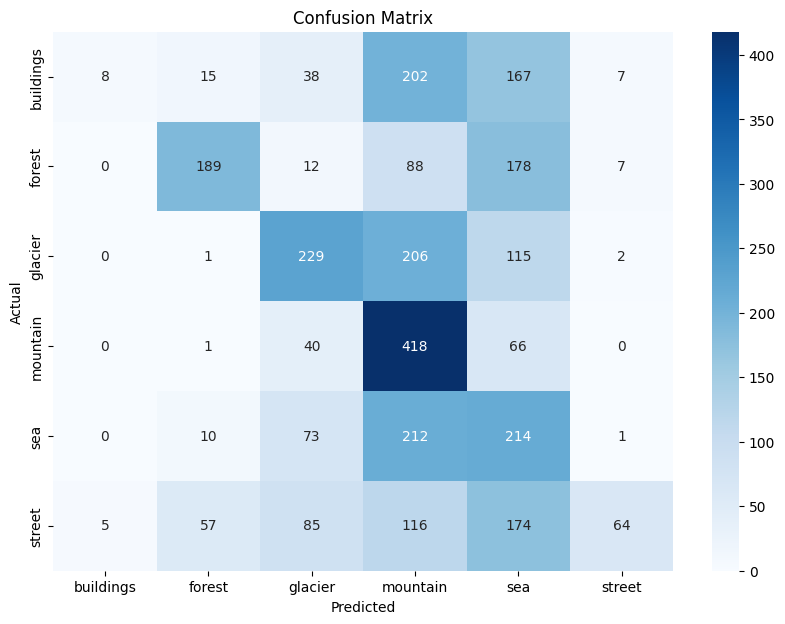

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Redimensionar as imagens para vetorizar
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_flat, y_train)

# Prever nos dados de validação
y_val_pred = knn.predict(X_val_flat)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Prever nos dados de teste
predictions = knn.predict(X_test_flat)
# Model Evaluation

# f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# F1 Score
f1 = f1_score(y_test_encoded, predictions, average='weighted')
print("F1 Score: ", f1)

# Precision
precision = precision_score(y_test_encoded, predictions, average='weighted')
print("Precision: ", precision)

# Recall
recall = recall_score(y_test_encoded, predictions, average='weighted')
print("Recall: ", recall)

# Accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy: ", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_encoded, predictions, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
